# Dataset Download & Exploration 

### [西洋棋盤dataset](https://public.roboflow.com/object-detection/chess-full)
- 13種棋子，會標註
- 共289張照片
- 圖片大小大2048*1371算不小


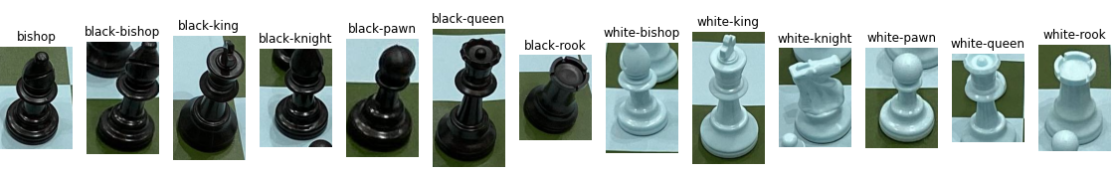

## 1.下載檔案並解壓縮

In [11]:
!mkdir -p data/coco
!curl -L "https://public.roboflow.com/ds/teSUuBdtOy?key=MSfxYe5Fz3" > data/coco/roboflow.zip
!unzip -f data/coco/roboflow.zip -d data/coco
!rm -rf data/coco/roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0    822      0  0:00:01  0:00:01 --:--:--   822
100 78.6M  100 78.6M    0     0  38.1M      0  0:00:02  0:00:02 --:--:--  111M
Archive:  data/coco/roboflow.zip
 extracting: data/coco/README.dataset.txt  
 extracting: data/coco/README.roboflow.txt  
   creating: data/coco/test/
 extracting: data/coco/test/0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg  
 extracting: data/coco/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg  
 extracting: data/coco/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df05bd1f86bab67c8368ae5e4ad.jpg  
 extracting: data/coco/test/410993714e325a1de3e394ffe860df3a_jpg.rf.519bf0fdbd5e38cd44cae1cfebc98536.jpg  
 extracting: data/coco/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.5b99421bf416463a8c75cfd07f8a68d1.jpg 

In [14]:
# 可以用tree看一下data資料夾有什麼
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


In [23]:
!tree data/coco -d
!tree data/coco/test

data/coco
├── test
├── train
└── valid

3 directories
data/coco/test
├── 0b47311f426ff926578c9d738d683e76_jpg.rf.0b55f43ac16aa65c889558d8ea757072.jpg
├── 1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.9ce88078ea356949f4ab7ad9cfdfc62d.jpg
├── 2f6fb003bb89cd401322a535acb42f65_jpg.rf.91ad9df05bd1f86bab67c8368ae5e4ad.jpg
├── 410993714e325a1de3e394ffe860df3a_jpg.rf.519bf0fdbd5e38cd44cae1cfebc98536.jpg
├── 4e3117459d759798537eb52cf5bf534d_jpg.rf.5b99421bf416463a8c75cfd07f8a68d1.jpg
├── 5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.a907af85301c729635d6ab1c31eb31b2.jpg
├── 654bb8835258b26c466b1c19893df451_jpg.rf.95aad22d4dd31ab256cb2bcff02a34dd.jpg
├── 685b860d412b91f5d4f7f9e643b84452_jpg.rf.5ba8dc0b5d2585d01b28089debd42cd6.jpg
├── 73a38a5c8f8f1b09f093f304660d5326_jpg.rf.2d2fa2f4b419d9f2a57fb82d38d8bc6b.jpg
├── 749e9074a77f8d34d86e2218f26cdab4_jpg.rf.8079f8abd9f24ec16e76fcbf18489f46.jpg
├── 7a34d8620235048917b28bcfd3b5572b_jpg.rf.71653deb6fe88ad472dabea12353373d.jpg
├── 8ff752f9ed443e6e49d495abfceb2032_jpg

## 2.觀察基本屬性

In [1]:
from os.path import join # 完整化路徑
import matplotlib.pyplot as plt # 畫圖
from pycocotools.coco import COCO  # 讀coco格式用的
import cv2 # 圖操作
import numpy as np # 向量操作

指定要看的annotation file讀取程coco object

In [2]:
data_dir="data/coco/train"
# data_dir="data/coco/test"
# data_dir="data/coco/valid"
anno_file=join(data_dir,"_annotations.coco.json")

coco_obj=COCO(anno_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


### 圖片

圖片物件重要屬性: id, file_name,height, width

In [3]:
print(coco_obj.imgs[0])
print("全部張數",len(coco_obj.imgs))

{'id': 0, 'license': 1, 'file_name': '889c420fb266b8d0e817306110042bda_jpg.rf.02d22a79820be51228296021ad0b6bbb.jpg', 'height': 1372, 'width': 2048, 'date_captured': '2021-02-23T17:28:48+00:00'}
全部張數 202


列出所有圖片長寬,稍微看一下

In [4]:
get_size=lambda elem: (elem[1]["height"],elem[1]["width"])
all_size=[*map(get_size,list(coco_obj.imgs.items()))]
all_size[:6]

[(1372, 2048),
 (1372, 2048),
 (1372, 2048),
 (1372, 2048),
 (1372, 2048),
 (1372, 2048)]

**觀察長寬分布**

In [40]:
all_size=np.array(all_size)
print("最小值",all_size.min(axis=0))
print("最大值",all_size.max(axis=0))

最小值 [1372 2048]
最大值 [1372 2048]


### 標註

標註物件重要屬性: id,image_id,category_id,bbox, area

In [6]:
print(coco_obj.anns[0])
print("全部張數",len(coco_obj.anns))

{'id': 0, 'image_id': 0, 'category_id': 13, 'bbox': [839, 260, 119, 175], 'area': 20825, 'segmentation': [], 'iscrowd': 0}
全部張數 2108


標註大小分布,用總面積當比較基準，再開根號預估標註長寬大概佔整個畫面長寬的多少

In [7]:
get_area=lambda elem: np.sqrt(elem[1]["area"]/np.prod(all_size.mean(axis=0)))
all_area=[*map(get_area,list(coco_obj.anns.items()))]
all_area[:6]

[0.08608955703427183,
 0.12138307596093291,
 0.07618304365585923,
 0.0756768384243601,
 0.07300555112884788,
 0.08188388079715282]

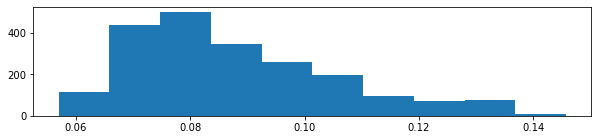

In [8]:
plt.figure(figsize=(10,2))
plt.hist(all_area)
plt.show()

長/寬大概佔總圖片一成左右

**觀察標註有沒有偏側**

一樣除以圖的長/寬 注意長寬是y,x分布

In [31]:
get_xy=lambda elem: elem["bbox"][:2]/all_size.mean(axis=0)[::-1]
all_xy=np.array([*map(get_xy,list(coco_obj.loadAnns(ids=coco_obj.anns)))])
all_xy[:6]

array([[0.40966797, 0.18950437],
       [0.31494141, 0.31049563],
       [0.40039062, 0.28498542],
       [0.32763672, 0.12536443],
       [0.24365234, 0.03644315],
       [0.22558594, 0.61588921]])

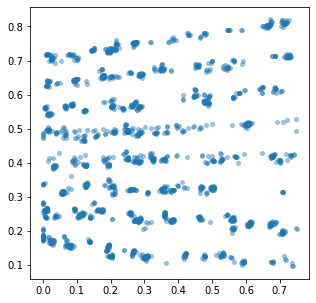

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(all_xy[:,1],all_xy[:,0],alpha=0.4,s=15)
plt.show()

大致分布在每個地方，但有特別間隔出現，並有些地方特別擁擠

可能需要做一些rotation類的augmentation

## 3.觀察各class內容

列出classes

In [11]:
classes=[x["name"] for i,x in coco_obj.cats.items()]
print(classes)

['pieces', 'bishop', 'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']


**class張數分布**

In [12]:
get_img=lambda cid: len(coco_obj.getImgIds(catIds=cid))
all_n_pic=[*map(get_img,list(coco_obj.cats)[1:])]

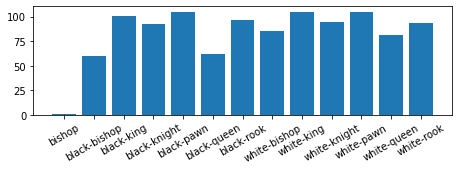

In [13]:
plt.figure(figsize=(7.5,2))
plt.bar(classes[1:],all_n_pic)
plt.xticks(rotation = 30) 
plt.show()

算分布得蠻平均

**class annotation分布**

In [14]:
get_annot=lambda cid: len(coco_obj.getAnnIds(catIds=cid))
all_n_annnot=[*map(get_annot,list(coco_obj.cats)[1:])]

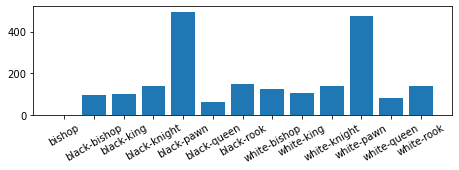

In [15]:
plt.figure(figsize=(7.5,2))
plt.bar(classes[1:],all_n_annnot)
plt.xticks(rotation = 30) 
plt.show()

哇，有點小小不平衡，遇到testing情況不好可以做balancing

把每種隨機畫出一個annotation內的內容

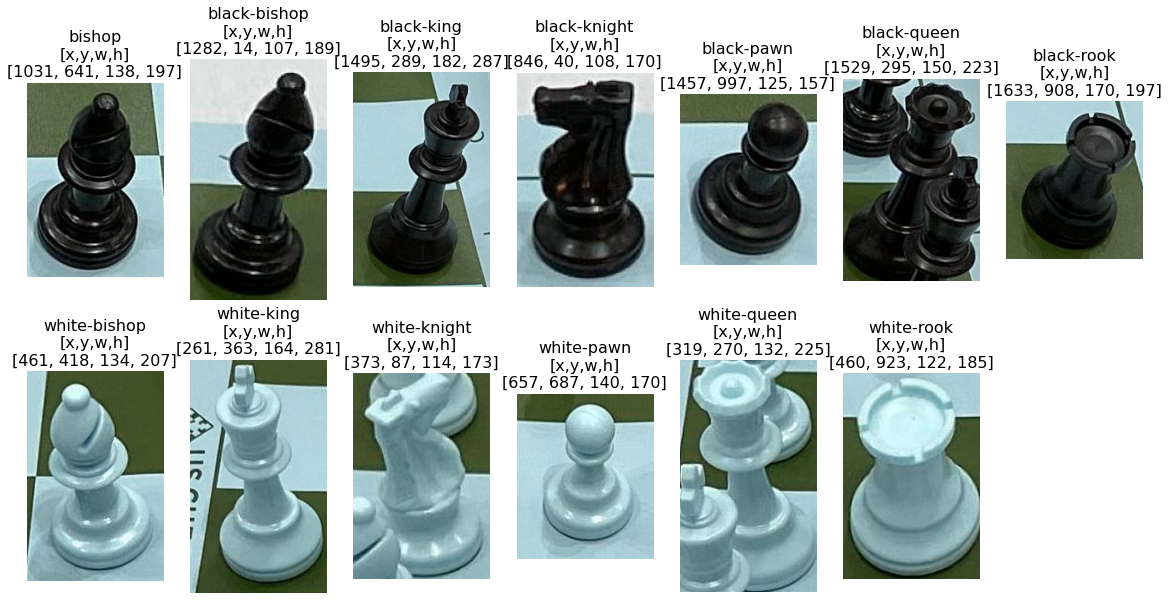

In [15]:
plt.figure(figsize=(20,10))
for cid,cls_name in enumerate(classes[1:],start=1):
    # 每個class隨一張
    im_id=int(np.random.permutation(coco_obj.getImgIds(catIds=cid))[0])
    # 讀取該image物件然後列出檔案名稱並組成完整檔案名稱
    im_name=join(data_dir,coco_obj.loadImgs(im_id)[0]['file_name'])
    # 查找該張圖片之annotation並讀取該annotation物件
    lbl_id=coco_obj.getAnnIds(imgIds=im_id,catIds=cid)[0]
    lbl_obj=coco_obj.loadAnns(lbl_id)[0]
    # 讀出讀片檔
    i=cv2.imread(im_name)
    # 讀出annotation座標和長寬
    x,y,w,h=lbl_obj['bbox']
    plt.subplot(2,len(classes)//2,cid)
    plt.imshow(i[y:y+h,x:x+w])
    plt.axis("off")
    plt.title(cls_name+f"\n[x,y,w,h]\n{lbl_obj['bbox']}",fontdict={'fontsize':16})

In [16]:
print("影像號碼",im_id)
print("影像檔名",im_name)
print("標註號碼",lbl_id)
print("標註物件",lbl_obj)
print("圖片大小",i.shape)
print("圖片位置長寬",x,y,w,h)

影像號碼 74
影像檔名 data/coco/train/IMG_0167_JPG.rf.661ad368ce42cadb9dc497ceaa07e777.jpg
標註號碼 746
標註物件 {'id': 746, 'image_id': 74, 'category_id': 13, 'bbox': [460, 923, 122, 185], 'area': 22570, 'segmentation': [], 'iscrowd': 0}
圖片大小 (1371, 2048, 3)
圖片位置長寬 460 923 122 185


## Exercise

1. 當然class的annotations可能有偏側，可以自行試著畫出每個class偏側情況

In [47]:
# 可以使用剛剛拿來get x,y值的小程式
get_xy=lambda elem: elem["bbox"][:2]/all_size.mean(axis=0)[::-1]

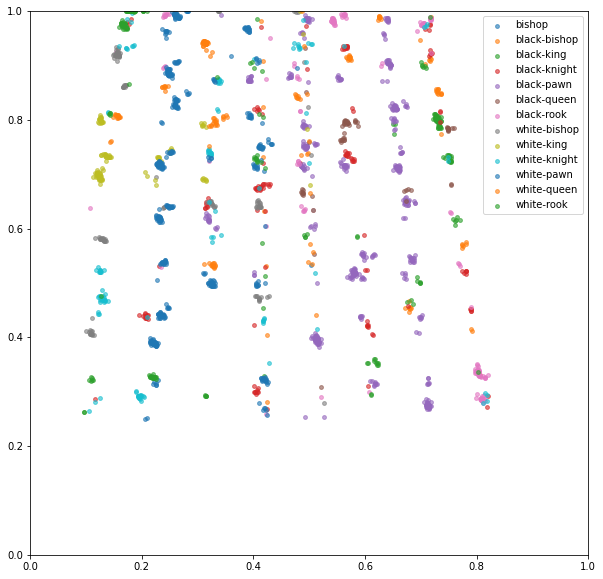

In [48]:
# hint
plt.figure(figsize=(10,10))
for ????????:
    single_clss_objects=?????
    class_xy=np.array([*map(get_xy,single_clss_objects)])
    plt.scatter(class_xy[:,1],class_xy[:,0],alpha=0.4,s=15,label=?????)

plt.legend()
plt.show()

2. Dataset 的主題是西洋棋，有特定規則，試著畫出黑棋與白棋偏側情況

In [50]:
# hint
black_cids=[??? for k,v in coco_obj.cats.items() if ???]
black_cids

[2, 3, 4, 5, 6, 7]

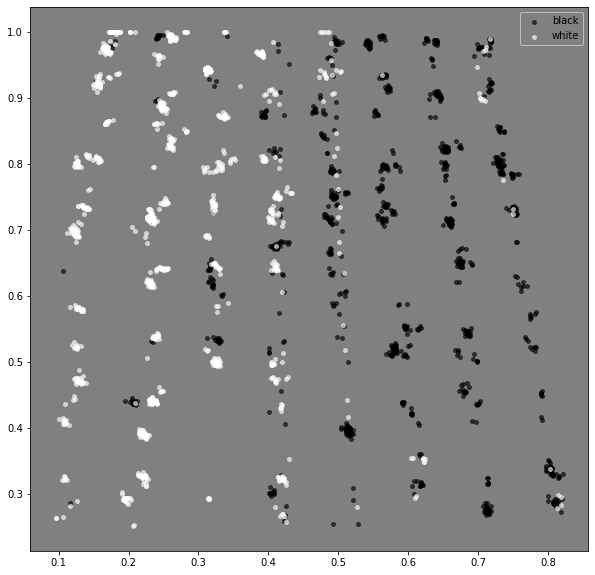

In [54]:
black_cids=???
white_cids=???

plt.figure(figsize=(10,10))
plt.rcParams['axes.facecolor'] = 'gray'
for ????????::
    single_clss_objects=???
    all_xy=np.array([*map(get_xy,single_clss_objects)])
    plt.scatter(all_xy[:,0],1-all_xy[:,1],alpha=0.6,s=15,label=????,color=????)

plt.legend()
plt.show()

## Reference

* https://public.roboflow.com/object-detection/chess-full